In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, linewidth=200, edgeitems=10)

import tensorflow as tf
from tensorflow import keras

C:\Users\hsiao\AppData\Local\Temp\ipykernel_12108\1967208715.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data() 

print('x_train:', x_train.shape,  '   y_train:', y_train.shape)
print('x_test: ', x_test.shape,   '   y_test: ', y_test.shape)

pd.Series(y_train).value_counts(sort=False)

x_train: (60000, 28, 28)    y_train: (60000,)
x_test:  (10000, 28, 28)    y_test:  (10000,)


5    5421
0    5923
4    5842
1    6742
9    5949
2    5958
3    6131
6    5918
7    6265
8    5851
dtype: int64

C:\Users\hsiao\AppData\Local\Temp\ipykernel_12108\1646816550.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(0,10,1))
C:\Users\hsiao\AppData\Local\Temp\ipykernel_12108\1646816550.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,7000,1000))


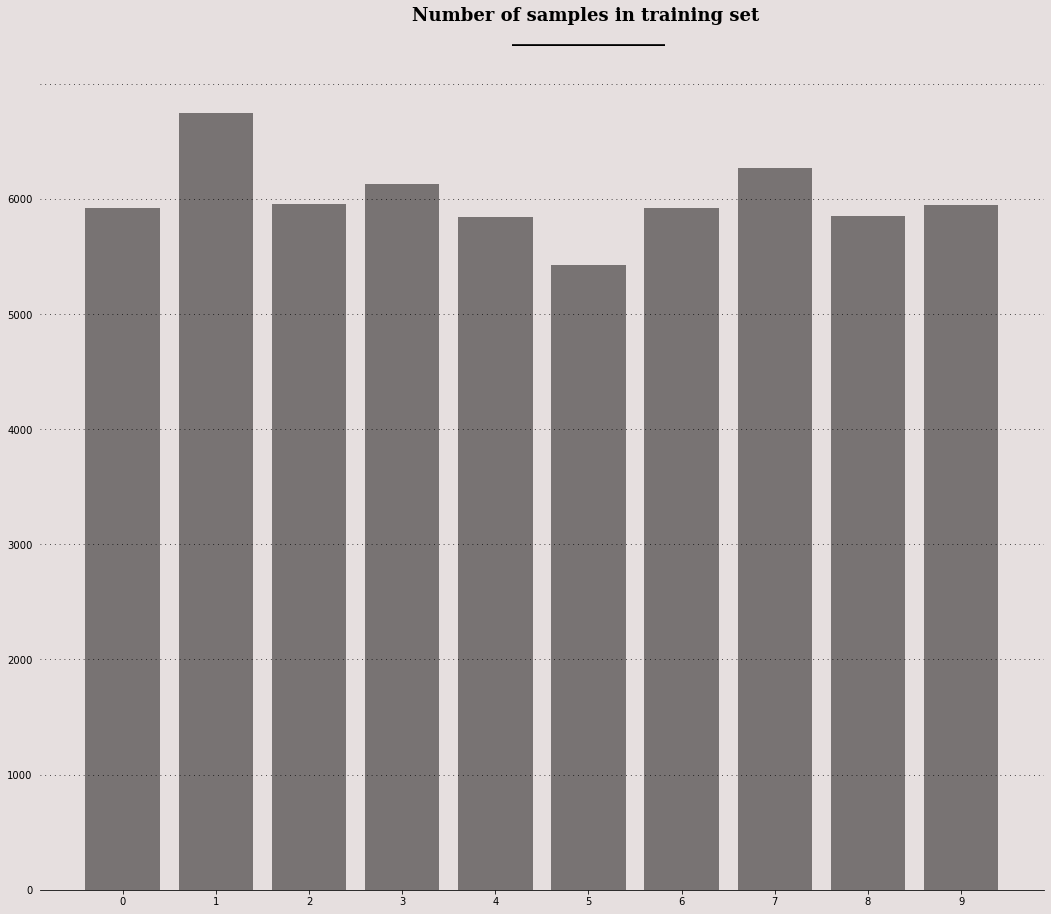

In [6]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot()

background_color = "#e6dfdf"
color_palette = ["#787373","#a0ada0","#a0abad","#a3a0ad","#da8829"]
fig.patch.set_facecolor(background_color) 
ax.set_facecolor(background_color) 

# Title of the plot
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(left=False, bottom=True)
ax.set_xticklabels(range(0,10,1))
ax.set_yticklabels(range(0,7000,1000))
ax.text(5,7500,'Number of samples in training set \n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")


ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.hist(y_train, bins=10, range=(0,10), align='left', rwidth=0.8, color = "#787373")
plt.xticks(range(0,10,1))
plt.show()
# ax.set_xlabel("")
# ax.set_ylabel("")


# for s in ["top","right","left"]:
#     ax1.spines[s].set_visible(False)

In [7]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

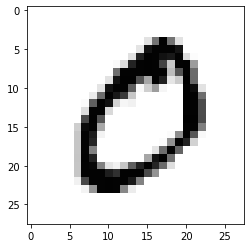

In [8]:
plt.imshow(x_train[1], cmap='Greys', interpolation='none')
plt.show()

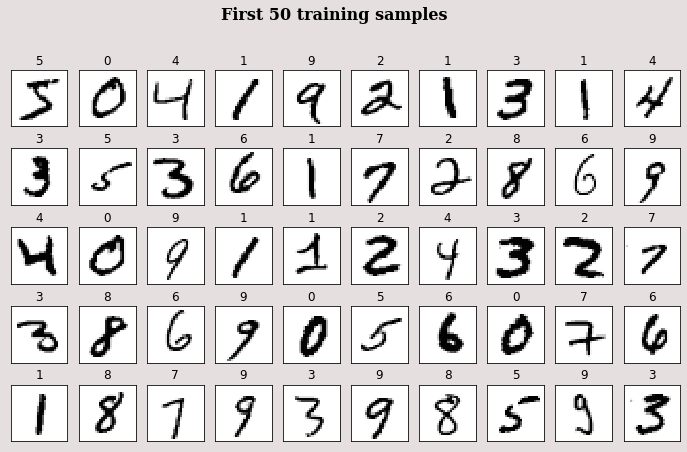

In [9]:
class_names = range(10)

fig = plt.figure(figsize=(12,7))
background_color = "#e6dfdf"
fig.patch.set_facecolor(background_color)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(x_train[i], cmap='Greys', interpolation='none')
    plt.title(class_names[y_train[i]])
    plt.xticks([])
    plt.yticks([])
plt.suptitle('First 50 training samples', fontsize=16, fontweight='bold',
         fontfamily='serif',
         color="#000000", horizontalalignment='center',
         verticalalignment='center')
plt.show()

### Normalization

In [10]:
x_train = x_train/ 255
x_test  = x_test / 255

In [11]:
with np.printoptions(precision=2):  print(x_train[0])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.07 0.07 0.07 0.49 0.53 0.69 0.1  0.65 1.   0.97 0.5  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.12 0.14 0.37 0.6  0.67 0.99 0.99 0.99 0.99 0.99 0.88 0.67 0.99 0.95 0.76 0.25 0.   0.   0.   0.  ]

### Non-neural-network ML models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score

X_train = x_train.reshape(-1,784)
X_test  = x_test.reshape(-1,784)

# model = LogisticRegression(solver='lbfgs', C=0.1, max_iter=1000)
#model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=1)
#model = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=1)
#model = KNeighborsClassifier(n_neighbors=5, p=2)
#model = GradientBoostingClassifier()
model = XGBClassifier(max_depth=5)

In [15]:
%time  model.fit(X_train, y_train)

print('Training accuracy:', model.score(X_train,y_train))
print('    Test accuracy:', model.score(X_test,y_test))

print('\nMeasuring performance using log loss (the lower the better):')
print('Training log loss:', log_loss(y_train, model.predict_proba(X_train)))
print('    Test log loss:', log_loss(y_test,  model.predict_proba(X_test)))

CPU times: total: 33min 41s
Wall time: 4min 46s
Training accuracy: 1.0
    Test accuracy: 0.9784

Measuring performance using log loss (the lower the better):
Training log loss: 0.005836081181726238
    Test log loss: 0.06968984939756183


### Artificial Neural Network

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

tf.random.set_seed(9)

# define a sequential neural network
nn = Sequential()

nn.add(Flatten(input_shape=(28,28)))    # Original 28x28 matrix input needs to be flattened

nn.add(Dense(512, activation='relu'))   # Add a densely-connected layer with 512 neurons

nn.add(Dense(256, activation='relu'))   # Add a densely-connected layer with 256 neurons

nn.add(Dense(10, activation='softmax')) # Output layer has 10 neurons, each representing one value of the target variable (0 to 9)

nn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy']  )

nn.summary()
print("Let's verify the number of weights: ", 785*512, 513*256, 257*10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Let's verify the number of weights:  401920 131328 2570


### Training model and evaluating

In [14]:
# Train 1 epoch. An epoch is an iteration over the entire x and y data provided.
nn.fit(x_train, y_train, epochs=1)
nn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0902 - accuracy: 0.9710


[0.0902300700545311, 0.9710000157356262]

In [18]:
# Fit: Train the above neural network, returns 'history' that records performance metrics
# One epoch is one round of feed-forward and backpropagation
# A validation set can be set aside to evaluate model performance at the end of each epoch

history = nn.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0789 - accuracy: 0.9751 - val_loss: 0.0783 - val_accuracy: 0.9757
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0580 - accuracy: 0.9811 - val_loss: 0.0755 - val_accuracy: 0.9775
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.1012 - val_accuracy: 0.9720
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0345 - accuracy: 0.9885 - val_loss: 0.0900 - val_accuracy: 0.9741
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0278 - accuracy: 0.9907 - val_loss: 0.0766 - val_accuracy: 0.9793
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.0983 - val_accuracy: 0.9761
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0223 - accuracy: 0.9923 - val_loss: 0.0892 - val_accuracy:

#### Observe underfitting and overfitting

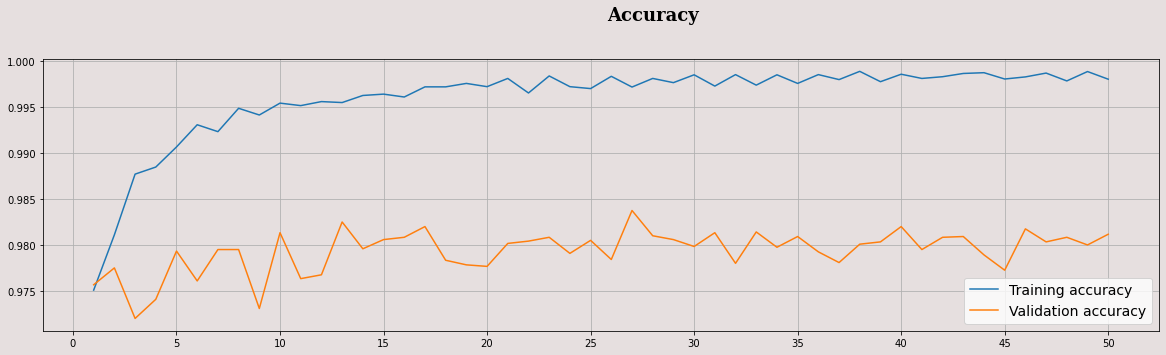

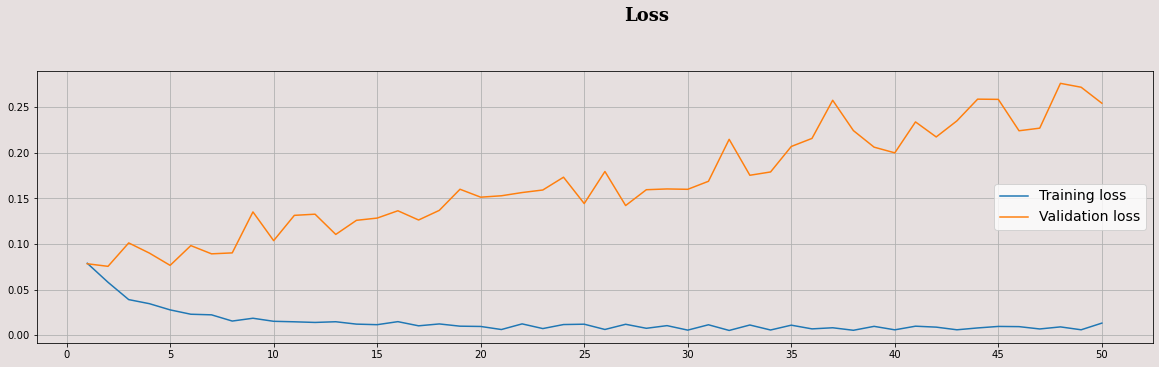

In [46]:
nepochs = 50 

fig = plt.figure(figsize=(20,5))
background_color = "#e6dfdf"
fig.patch.set_facecolor(background_color)
ax = fig.add_subplot(1,1,1)
ax.plot(range(1,nepochs+1), history.history['accuracy'], label='Training accuracy')
ax.plot(range(1,nepochs+1), history.history['val_accuracy'], label='Validation accuracy')
ax.legend(loc='lower right', fontsize=14)
ax.set_facecolor(background_color)
ax.text(28,1.005,'Accuracy',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
plt.xticks(np.arange(0, nepochs+1,5))
plt.grid()
plt.show()

fig = plt.figure(figsize=(20,5))
fig.patch.set_facecolor(background_color)
ax = fig.add_subplot(1,1,1)
ax.plot(range(1,nepochs+1), history.history['loss'], label='Training loss')
ax.plot(range(1,nepochs+1), history.history['val_loss'], label='Validation loss')
ax.legend(loc='center right', fontsize=14)
ax.set_facecolor(background_color)
ax.text(28,0.35,'Loss',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
plt.xticks(np.arange(0, nepochs+1,5))
plt.grid()
plt.show()

#### Use epoch = 10 as the best number of epochs

In [15]:
# Before running the following line, go back to reconstruct the neural network model so that all the weights are reset
%time  nn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0764 - accuracy: 0.9764
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0571 - accuracy: 0.9823
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0425 - accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0328 - accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0267 - accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0236 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0202 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

### Try another ANN

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

tf.random.set_seed(9)

# define a sequential neural network
nn = Sequential()

nn.add(Flatten(input_shape=(28,28)))    # Original 28x28 matrix input needs to be flattened

nn.add(Dense(256, activation='relu'))   # Add a densely-connected layer with 256 neurons

nn.add(Dense(10, activation='softmax')) # Output layer has 10 neurons, each representing one value of the target variable (0 to 9)

nn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy']  )

%time  nn.fit(x_train, y_train, epochs=8)

print('Test accuracy:')
nn.evaluate(x_test, y_test)

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2247 - accuracy: 0.9343
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0902 - accuracy: 0.9733
Epoch 3/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0587 - accuracy: 0.9821
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0406 - accuracy: 0.9871
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9900
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0163 - accuracy: 0.9948
CPU times: total: 1min 7s
Wall time: 25.7 s
Test accuracy:
313/313 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9779


[0.08407074213027954, 0.9779000282287598]

### Save Model

In [16]:
nn.save('Computer_Vision_1.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Computer_Vision_1.model\assets


### Load Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200, edgeitems=10)
import tensorflow as tf
from tensorflow import keras

# Load the model (To run this, you must have saved a model first)
nn = keras.models.load_model('my_digit_reader.model')
#nn = keras.models.load_model('my_fashion_reader.model')

# Load the test data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train/ 255
x_test  = x_test / 255

# Evaluate the model to verify the performance on the test data
nn.evaluate(x_test, y_test)

### Recognize digits in unseen data

In [17]:
class_names = range(10)

print('Probabilistic Predictions:')
pd.set_option('display.float_format', lambda x: '0' if x<5e-5 else ('%.4f'% x))
pd.DataFrame(nn.predict(x_test)[0:20], columns=class_names)

Probabilistic Predictions:


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1.0000,0,0
1,0,0,1.0000,0,0,0,0,0,0,0
2,0,1.0000,0,0,0,0,0,0,0,0
3,1.0000,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0.9998,0,0,0,0,0.0002
5,0,1.0000,0,0,0,0,0,0,0,0
6,0,0,0,0,0.9997,0,0,0,0,0.0002
7,0,0,0,0,0,0,0,0,0,1.0000
8,0,0,0,0,0,0.1798,0.8200,0,0.0001,0
9,0,0,0,0,0,0,0,0,0,1.0000


In [18]:
pred_prob = nn.predict(x_test)
pred = np.argmax(pred_prob, axis=1)

print('Actual digit:   ', y_test[0:50])
print('Predicted digit:', pred[0:50])
print('Error:          ', np.where(pred[0:50]-y_test[0:50]==0, 0, 'Error'))

Actual digit:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4]
Predicted digit: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4]
Error:           ['0' '0' '0' '0' '0' '0' '0' '0' 'Error' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0']


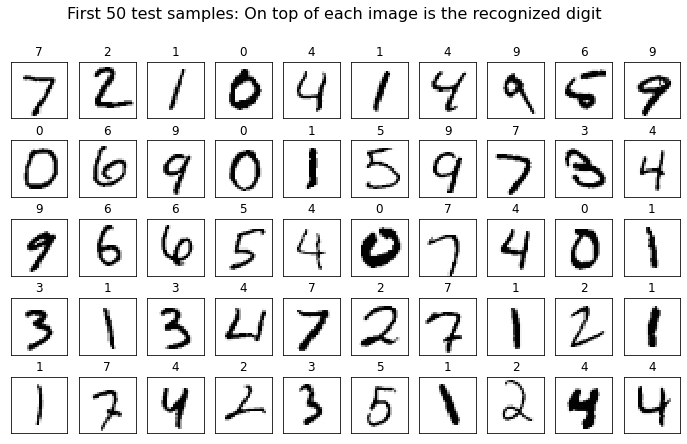

In [19]:
plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(x_test[i], cmap='Greys', interpolation='none')
    plt.title(class_names[pred[i]])
    plt.xticks([])
    plt.yticks([])
plt.suptitle('First 50 test samples: On top of each image is the recognized digit', fontsize=16)    
plt.show()

### Misclassified samples

number of misclassified samples: 186


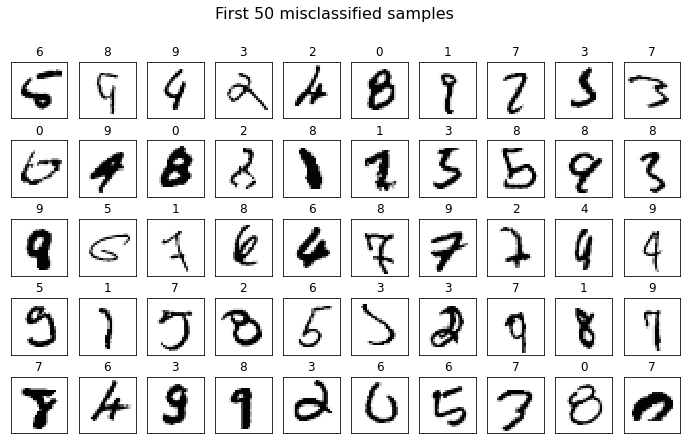

In [20]:
pred_prob = nn.predict(x_test)
pred = np.argmax(pred_prob, axis=1)

print('number of misclassified samples:', np.sum(pred != y_test))

# find the indices of test samples that are misclassified
misclf = np.argwhere(pred != y_test).flatten()

plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(x_test[misclf[i]], cmap='Greys', interpolation='none')
    plt.title(class_names[pred[misclf[i]]])
    plt.xticks([])
    plt.yticks([])
plt.suptitle('First 50 misclassified samples', fontsize=16)
plt.show()

In [21]:
print('Probabilistic Predictions on some misclassified test samples:')
pd.set_option('display.float_format', lambda x: '0' if x<5e-5 else ('%.4f'% x))
pd.DataFrame(pred_prob[misclf[:20]], columns=class_names)

Probabilistic Predictions on some misclassified test samples:


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0.1798,0.8200,0,0.0001,0
1,0,0,0,0,0,0.0026,0.0001,0.0001,0.6800,0.3172
2,0,0,0,0,0.0149,0.0001,0.0428,0,0.0006,0.9415
3,0,0,0.4638,0.5318,0.0002,0,0,0.0001,0,0.0040
4,0,0,0.9883,0,0.0006,0,0.0111,0,0,0
5,0.5395,0.0001,0.0014,0.0001,0,0.0121,0.2290,0,0.2178,0
6,0,0.6226,0,0.0001,0.0001,0,0,0.0009,0.1043,0.2719
7,0,0,0.0063,0.0001,0,0,0,0.9937,0,0
8,0,0,0,0.9101,0,0.0899,0,0,0,0
9,0,0,0,0.2880,0,0,0,0.7119,0,0
